*Maciej Bogusławski (331362), Hubert Kaczyński (331386)*
# **WSI ćw. 5. Sieci neuronowe.**

Niniejszy notatnik ma na celu implementację perceptronu dwuwarstwowego, reprezentującego funkcję $J: [-5; 5] -> R$ w postaci $ J(x) = \sin(x\sqrt{3}) + \cos(x\sqrt{7}) $.

Perceptron stanowi najprostszą sieć neuronową mającą na celu binarne klasyfikowanie danych wejściowych, czyli określanie przynależności do jednej z dwóch klas. W ramach działania perceptronu, każda cecha pomnożona jest przez konkretną wagę, wyznaczając wzór funkcji. W procesie uczenia modelu zarówno wagi, jak i wyraz wolny funkcji, są odpowiednio modyfikowane, bazując na błędzie pomiędzy aktualnie przewidywaną wartością a wartością rzeczywistą. W każdym kroku wynik tej funkcji dodatkowo mnożony jest przez wynik funkcji aktywacji - w oryginalnym perceptronie funkcję tą stanowiła funkcja skokowa, przyjmująca wartość 0 lub 1. Z matematycznego punktu widzenia działanie funkcji skokowej przedstawić można jako podzielenie przestrzeni dwuwymiarowej na dwie półprzestrzenie. Wejścia, dla których skokowa funkcja aktywacji przyjmuje wartość 0, muszą znajdować się więc w innej półpłaszczyźnie niż te, dla których wartość funkcji aktywacji wynosi 1. Innymi słowy, w przypadku perceptronu prostego wykorzystującego funkcję skokową, możliwe jest jedynie klasyfikowanie danych na zbiory liniowo separowalne.

W przypadku niniejszej implementacji funkcją aktywacji jest funkcja tangensa hiperbolicznego (tanh), która przyjmuje wartości w zakresie od -1 do 1. Funkcja ta umożliwia bardziej elastyczny podział danych wejściowych na klasy w sposób nieliniowy. 

Perceptron dwuwarstwowy rozszerza pojęcia perceptronu prostego. Składa się nie tylko z warstwy wejściowej oraz warstwy wyjściowej, ale również jednej warstwy ukrytej pomiędzy tymi dwoma warstwami. Dane wejściowe przekazywane są z warstwy wejściowej do warstwy ukrytej, w której przestrzeń sygnałów wejściowych dzielona jest z pomocą hiperpłaszczyzny na dwie półprzestrzenie. Użycie funkcji tanh pozwala na lepsze oddzielenie podprzestrzeni klas. Ten sam proces powtórzony zostaje w warstwie wyjściowej. Eliminuje to więc nakładane przez perceptron prosty i funkcje skokowe ograniczenie, pozwalając na klasyfikowanie zbiorów, które nie są liniowo separowalne. W ten sposób perceptron dwuwarstwowy pozwala na zrealizowanie bardziej zaawansowanych funkcji.

### **Analiza danych**

Implementowany w ramach tego zadania perceptron dwuwarstwowy ma za zadanie reprezentować funkcję $J: [-5; 5] -> R$ w postaci $ J(x) = \sin(x\sqrt{3}) + \cos(x\sqrt{7}) $. Poniższy kod tworzy reprezentowaną przez perceptron funkcję `J(x)` oraz generuje potrzebne dane. Dane zbioru treningowego oraz dane zbioru testowego wygenerowane zostają oddzielnie tak, aby punkty zbioru testowego nie należały do zbioru treningowego.

In [1]:
import numpy as np

def J(x):
    return np.sin(x * np.sqrt(3)) + np.cos(x * np.sqrt(7))

N = 1000
X = np.linspace(-5, 5, N).reshape(-1, 1)
Y = J(X)

X_test = np.linspace(-5, 5, N//3).reshape(-1, 1)
Y_test = J(X_test)

Wykres reprezentowanej funkcji przedstawić można na wykresie.

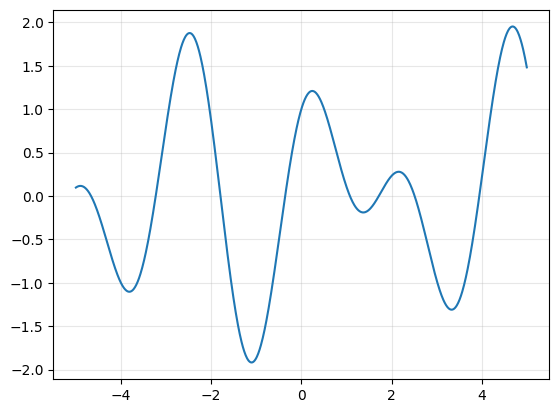

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, Y)
plt.grid(alpha=0.3)
plt.show()

## **Implementacja perceptronu dwuwarstwowego**

Poniżej znajduje się klasa MLP, która implementuje działanie perceptronu dwuwarstwowego. Konstruktor klasy MLP przyjmuje 3 parametry - `input_size`, czyli liczba neuronów w warstwie wejściowej, `hidden_size`, czyli liczba neuronów w warstwie ukrytej, oraz `output_size`, czyli liczba neuronów w warstwie wyjściowej.

Początkowe wagi i wyrazy wolne (`weights1`, `weights2`, `biases1`, `biases2`) są dobierane losowo z pomocą funkcji `np.random.randn`.

Jak wspomniano na wstępie notatnika, w ramach tej implementacji perceptron korzysta z funkcji aktywacji w postaci funkcji tangensa hiperbolicznego - `tanh`, znosząc ograniczenia związane z potrzebą klasyfikowania danych na zbiory liniowo separowalne w przypadku użycia funkcji skokowej.

Do obliczania gradientów w propagacji wstecznej używana jest metoda `tanh_gradient`. Zwraca ona pochodną funkcji aktywacji tangensa hiperbolicznego:

$$tanh'(x) = 1 - tanh^2(x)$$

Metoda `forward` odpowiada za przeprowadzanie obliczeń dla jednego przepływu danych przez sieć neuronową (propagacja do przodu). W ramach tej metody, sygnały wejściowe przechodzą przez kolejno odpowiadające im wagi `weights1` i dodawane są do nich wyrazy wolne `biases1`, tworząc wynik, który następnie przepuszczany jest przez funkcję aktywacji. Następnie dane z warstwy ukrytej przetwarzane są w sposób analogiczny przez wagi `weights2` i wyrazy wolne `biases2`. Metoda zwraca wynik z wyjścia warstwy końcowej.

Metoda `backward` realizuje propagację wsteczną w celu aktualizacji wag i wyrazów wolnych na podstawie błędu MSE. Funkcja ta wywołuje metodę `forward`, obliczając wyniki na podstawie obecnych wartości wag i wyrazów wolnych. Następnie, wyznaczone w ten sposób wyniki używane są do obliczenia błędu warstwy wyjściowej `error2`. Na tej podstawie wyliczane zostają gradienty wag warstwy wyjściowej, korzystając ze wzoru analogicznego do wzoru na gradient wag w ramach zadania LAB4:

$$ weights2_{grad} = \frac{{a1}^T \cdot {error2}}{liczbawierszy} $$

Wyznaczane zostają również gradienty wyrazów wolnych warstwy wyjściowej:

$$ biases2_{grad} = \frac{{sum}(error2) }{liczbawierszy}$$

Analogicznie, wyznaczane są również błędy oraz gradienty wag oraz wyrazów wolnych dla warstwy ukrytej - błąd warstwy ukrytej `error1` przechodzi jednak przez pochodną funkcji aktywacji `tanh`, czyli `tanh_gradient`.

Następnie, na podstawie wyznaczonych w ten sposób gradientów następuje aktualizacja wag oraz wyrazów wolnych. Parametr `learning_rate` decyduje o tym jak szybko algorytm schodzi w dół gradientu. Na koniec metoda zwraca błąd średniokwadratowy.

Metoda `train`, używana na zbiorze treningowym, odpowiada za uczenie sieci neuronowej na podstawie podanych danych wejściowych. Ilość wykonanych iteracji zależy od parametru `num_iter`. Parametr comment służy jedynie do wizualizacji działania algorytmu. Metoda zwraca listę wartości błędu średniokwadratowego po każdej iteracji (`losses`).

Metoda `predict`, używana na zbiorze testowym, dokonuje przewidywania wyniku na podstawie wyuczonych już wag.

In [3]:
np.random.seed(999)

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.weights1 = np.random.randn(input_size, hidden_size)
        self.biases1 = np.random.randn(hidden_size)
        self.weights2 = np.random.randn(hidden_size, output_size)
        self.biases2 = np.random.randn(output_size)
    
    def tanh_gradient(self, x):
        return 1 - np.tanh(x) ** 2
    
    def forward(self, x):
        self.z1 = np.dot(x, self.weights1) + self.biases1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.biases2
        self.a2 = self.z2

        return self.a2
    
    def backward(self, x, y, learning_rate):
        m = x.shape[0]

        self.forward(x)

        error2 = np.clip(self.a2 - y, -1e10, 1e10)

        gradient_weights2 = np.dot(self.a1.T, error2) / m
        gradient_biases2 = np.sum(error2, axis=0) / m

        error1 = np.clip(np.dot(error2, self.weights2.T) * self.tanh_gradient(self.z1), -1e10, 1e10)

        gradient_weights1 = np.dot(x.T, error1) / m
        gradient_biases1 = np.sum(error1, axis=0) / m

        self.weights1 -= learning_rate * gradient_weights1
        self.biases1 -= learning_rate * gradient_biases1
        self.weights2 -= learning_rate * gradient_weights2
        self.biases2 -= learning_rate * gradient_biases2

        return np.clip(np.mean(error2 ** 2), -1e10, 1e10)

    def train(self, X, Y, num_iter, learning_rate, comment=False):
        losses = []

        for it in range(num_iter):
            loss = self.backward(X, Y, learning_rate)
            losses.append(loss)

            if it % 100 == 0 and comment:
                print(f'Iteracja {it}, Błąd: {loss}')

        return losses
    
    def predict(self, x):
        return self.forward(x)


#### **Przykładowe wykonanie**

Poniżej znajduje się przykładowe wykonanie zaimplementowanego algorytmu dla 200 neuronów w warstwie ukrytej, 10000 iteracji oraz parametru learning_rate = 0.02. Przedstawiona została również wizualizacja jego wyników:

In [4]:
mlp = MLP(1, 200, 1)
losses = mlp.train(X, Y, 10000, 0.02, comment=True)

Iteracja 0, Błąd: 23.493380437856487
Iteracja 100, Błąd: 0.4951615470120722
Iteracja 200, Błąd: 0.31627498399652326
Iteracja 300, Błąd: 0.22358699354744957
Iteracja 400, Błąd: 0.17505034937546599
Iteracja 500, Błąd: 0.1486514056783946
Iteracja 600, Błąd: 0.12963032374020542
Iteracja 700, Błąd: 0.11489164773675042
Iteracja 800, Błąd: 0.10308357848493303
Iteracja 900, Błąd: 0.09340683556953965
Iteracja 1000, Błąd: 0.0853295154986638
Iteracja 1100, Błąd: 0.07847834963915579
Iteracja 1200, Błąd: 0.07258384071971577
Iteracja 1300, Błąd: 0.06744805987979711
Iteracja 1400, Błąd: 0.06292424537250689
Iteracja 1500, Błąd: 0.0589030085233055
Iteracja 1600, Błąd: 0.05530244757660201
Iteracja 1700, Błąd: 0.052060795174790536
Iteracja 1800, Błąd: 0.04913086079330695
Iteracja 1900, Błąd: 0.04647582315292634
Iteracja 2000, Błąd: 0.04406608526718978
Iteracja 2100, Błąd: 0.0418769952479288
Iteracja 2200, Błąd: 0.03988727550717354
Iteracja 2300, Błąd: 0.03807801043703001
Iteracja 2400, Błąd: 0.0364320438

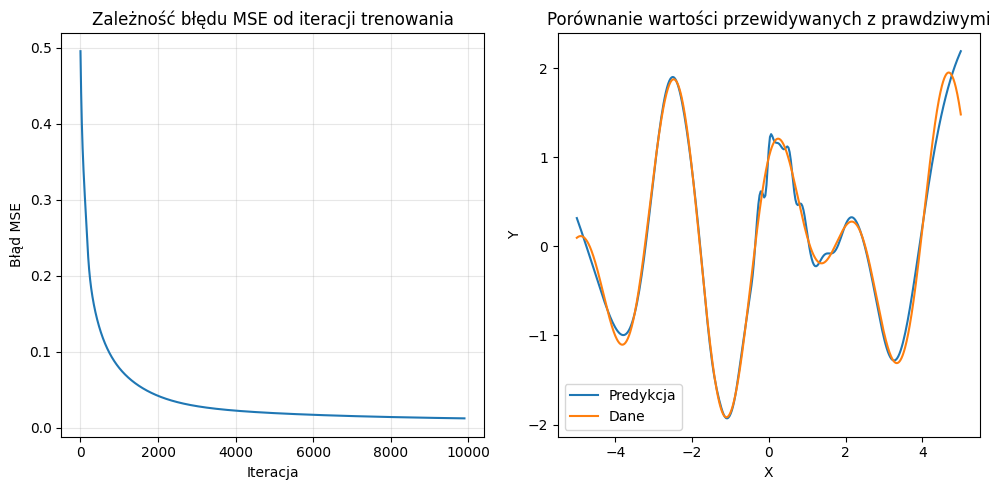

In [5]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(losses[100:])
plt.xlabel('Iteracja')
plt.ylabel('Błąd MSE')
plt.title('Zależność błędu MSE od iteracji trenowania')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
Y_pred = mlp.predict(X_test)
plt.plot(X_test, Y_pred, label='Predykcja')
plt.plot(X, Y, label='Dane')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Porównanie wartości przewidywanych z prawdziwymi')
plt.legend()

plt.tight_layout()
plt.show()

Powyższe wykresy pokazują, iż algorytm w satysfakcjonujący sposób przewiduje wartości zadanej funkcji. Zgodnie z zamysłem zmniejsza on błąd z każdą iteracją i ostateczny wynik jest wizualnie bardzo zbliżony do prawdziwego.

## **Analiza wpływu hiperparametrów na działanie algorytmu**

Poniższy kod służy do wygenerowania wyników przewidywań algorytmu, dla różnych wartości jego parametrów `hidden_size` (liczba neuronów w warstwie ukrytej), `num_iter` (całkowita liczba iteracji) oraz `learning_rate`. Wykonanie wszystkich pomiarów jest zadaniem czasochłonnym - zostało więc ono zakomentowane. 

In [6]:
hidden_sizes = [5, 10, 20, 50, 100, 200]
num_iters = [1000, 5000, 10000]
learning_rates = [0.001, 0.005, 0.01, 0.02]

def analyse():

    X = np.linspace(-5, 5, N).reshape(-1, 1)
    Y = J(X)

    results = {}

    for hidden_size in hidden_sizes:
        for num_iter in num_iters:
            for learning_rate in learning_rates:
                print(f'Analizuję: hidden_size={hidden_size}, num_iter={num_iter}, learning_rate={learning_rate}')
                mlp = MLP(1, hidden_size, 1)
                losses = mlp.train(X, Y, num_iter, learning_rate)
                
                Y_pred = mlp.predict(X_test)
                mse = np.mean((Y_test - Y_pred) ** 2)
                results[(hidden_size, num_iter, learning_rate)] = {'losses': losses, 'mse': mse}

    return results

In [7]:
# Zakomentowano, bo analiza trwa kilka minut
# results = analyse()

W celu ułatwienia uruchomienia notatnika bez potrzeby uruchamiania funkcji `analyse`, dane te zostały zapisane do pliku `results.pkl`.

In [8]:
# Zapisanie wyników do pliku
# import pickle
# with open('results.pkl', 'wb') as f:
#     pickle.dump(results, f)

In [9]:
import pickle

with open('results.pkl', 'rb') as f:
    results_loaded = pickle.load(f)

Dalsza część notatnika skupia się na analizie uzyskanych wyników.

### **Analiza wyników**
Poniższy kod tworzy tabelę porównującą ostateczną wartość błędu średniokwadratowego w zależności od wartości parametrów `hidden_size` i `learning_rate` dla 10000 iteracji. 

In [10]:
import pandas as pd

results_10000_iters = {k: v for k, v in results_loaded.items() if k[1] == 10000}

data = np.zeros((len(hidden_sizes), len(learning_rates)))

for i, hidden_size in enumerate(hidden_sizes):
    for j, learning_rate in enumerate(learning_rates):
        data[i, j] = results_10000_iters[(hidden_size, 10000, learning_rate)]['mse']

df = pd.DataFrame(data, index=hidden_sizes, columns=learning_rates)

df.index.name = 'hidden_size'
df.columns.name = 'learning_rate'
df

learning_rate,0.001,0.005,0.010,0.020
hidden_size,,,,
5,0.876585,1.017227,0.585683,0.331819
10,0.785751,0.390212,0.277311,0.120652
20,0.649536,0.292996,0.188408,0.133069
50,0.335900,0.237019,0.123797,0.054120
100,0.195355,0.163872,0.053148,0.042502
200,0.157385,0.058426,0.060858,0.034062


Jak można odczytać z tabeli, najniższą wartość błędu średniokwadratowego algorytm osiąga dla `hidden_size`=200, `learning_rate`=0.02. Poniższa część notatnika bada dogłębnie wpływ danych parametrów na wartość błędu średniokwadratowego.

### **Wartość MSE w zależności od wartości parametru `learning_rate`**

Poniższy kod tworzy wykres obrazujący wartość błędu średniokwadratowego na przestrzeni iteracji trenowania modelu dla różnych wartości parametru `learning_rate`.

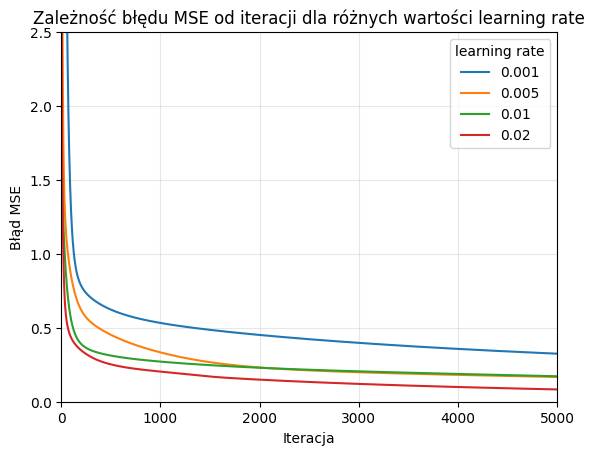

In [11]:
learning_rates_results = {k: v for k, v in results_loaded.items() if k[0] == 100 and k[1] == 5000}
for k, v in learning_rates_results.items():
    plt.plot(v['losses'], label=f'{k[2]}')
plt.xlabel('Iteracja')
plt.xlim(0, 5000)
plt.ylabel('Błąd MSE')
plt.ylim(0, 2.5)
plt.title('Zależność błędu MSE od iteracji dla różnych wartości learning rate')
plt.legend(title='learning rate')
plt.grid(alpha=0.3)
plt.show()

Powyższy wykres pokazuje, że najlepsze wyniki algorytm osiąga dla `learning_rate` równego 0.02. Taka wartość zapewnia systematyczny i relatywnie szybki, lecz zrównoważony spadek błędu MSE.

### **Wartość MSE w zależności od liczby neuronów w warstwie ukrytej**

Poniższy kod tworzy dwa wykresy. Wykres 1 obrazuje w jaki sposób dla parametru `learning_rate` = 0.01 zmienia się błąd MSE na przestrzeni 10000 iteracji trenowania modelu. Każda krzywa reprezentuje analizę dla innej ilości neuronów w warstwie ukrytej. Wykres 2 w postaci wykresu słupkowego obrazuje wartość błędu MSE między danymi przewidywanymi a prawdziwymi wartościami danych testowych dla modelu wytrenowanego dla 10000 iteracji i `learning_rate` równemu 0.01. Każdy słupek odpowiada innej ilości neuronów w warstwie ukrytej.

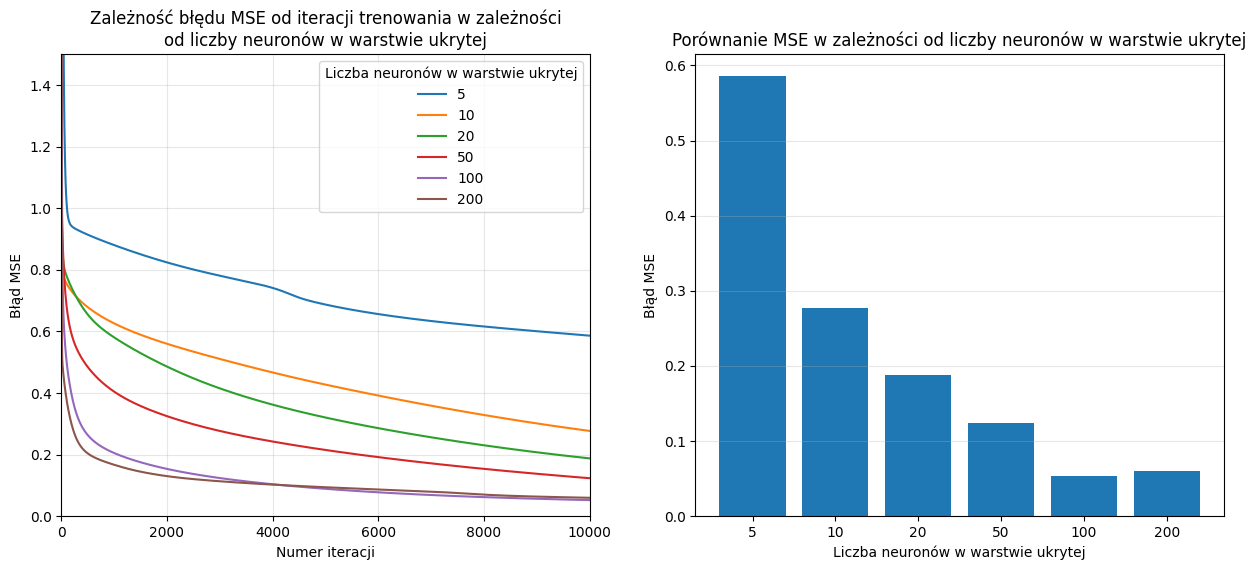

In [12]:
hidden_sizes_results = {k: v for k, v in results_loaded.items() if k[1] == 10000 and k[2] == 0.01}

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

for hidden_size, result in hidden_sizes_results.items():
    plt.plot(result['losses'], label=f'{hidden_size[0]}')
plt.xlabel('Numer iteracji')
plt.xlim(0, 10000)
plt.ylabel('Błąd MSE')
plt.ylim(0, 1.5)
plt.title('Zależność błędu MSE od iteracji trenowania w zależności\nod liczby neuronów w warstwie ukrytej')
plt.legend(title='Liczba neuronów w warstwie ukrytej')
plt.grid(alpha=0.3)


hidden_sizes = [params[0] for params in hidden_sizes_results.keys()]
mses = [res['mse'] for res in hidden_sizes_results.values()]

plt.subplot(1, 2, 2)
plt.bar([str(h) for h in hidden_sizes], mses)
plt.xlabel('Liczba neuronów w warstwie ukrytej')
plt.ylabel('Błąd MSE')
plt.title('Porównanie MSE w zależności od liczby neuronów w warstwie ukrytej')
plt.grid(alpha=0.3, axis='y')
plt.show()

Wykres 1 pokazuje jasno, że dla dowolnej z zadanych ilości neuronów w warstwie ukrytej, algorytm z każdą iteracją zmniejsza błąd MSE. Widać również, że ogólne najmniejsze wartości błędu przypadają dla największej ilości neuronów w warstwie ukrytej. Dla zadanych parametrów nie widać oznak przeuczenia modelu. Wyniki są spodziewane, ponieważ umożliwienie algorytmowi działania przez dłuższy czas pozwala mu na jeszcze lepsze dopracowanie przewidzianego wyniku. Wykres obrazuje również, iż wykonania z małą ilością neuronów w warstwie ukrytej o wiele wolniej docierają do małych wartości błędu MSE. Wynika to z tego, iż duża ilość neuronów pozwala na znacznie efektywniejsze i szybsze przewidzenie dobrego wyniku - każda iteracja jest efektywniejsza. Widać to szczególnie dla przypadku, w którym znajduje się 5 neuronów warstwy ukrytej. W takim scenariuszu błąd MSE po wykonaniu 10000 iteracji znacząco przewyższa błędy algorytmów z większą ilością neuronów. Dowodzi to, że wraz ze zwiększaniem się numeru iteracji oraz liczby neuronów w warstwie ukrytej rośnie skuteczność algorytmu.

Wykres 2 pokazuje jasną zależność malejącą błędu dla rosnącej ilości neuronów w warstwie ukrytej. Dla bardzo małych ilości neuronów skok błędu w dół jest dość znaczący. Dla większych ilości błąd spada wolniej, ale utrzymuje trend malejący. Udowadnia to korzystny wpływ obecności dużej ilości neuronów na jakość wyniku przewidywania. Dzieje się tak, ponieważ większa ilość neuronów w warstwie ukrytej pozwala na lepszą reprezentację złożonych wzorców oraz zwiększenie zdolności generalizacji perceptronu. Korzystnym wnioskiem jest też widoczny na wynikach brak przeuczenia modelu dla zadanych parametrów.

### **Wizualizacja wyniku dla różnych liczb neuronów warstwy ukrytej**

Poniższy kod wizualizuje różnicę w wynikach trenowania i przewidywania algorytmu dla 5, a następnie 200 neuronów warstwy ukrytej.

In [13]:
mlp_5 = MLP(1, 5, 1)
losses_5 = mlp_5.train(X, Y, 10000, 0.01)
Y_pred_5 = mlp_5.predict(X_test)

mlp_200 = MLP(1, 200, 1)
losses_200 = mlp_200.train(X, Y, 10000, 0.01)
Y_pred_200 = mlp_200.predict(X_test)

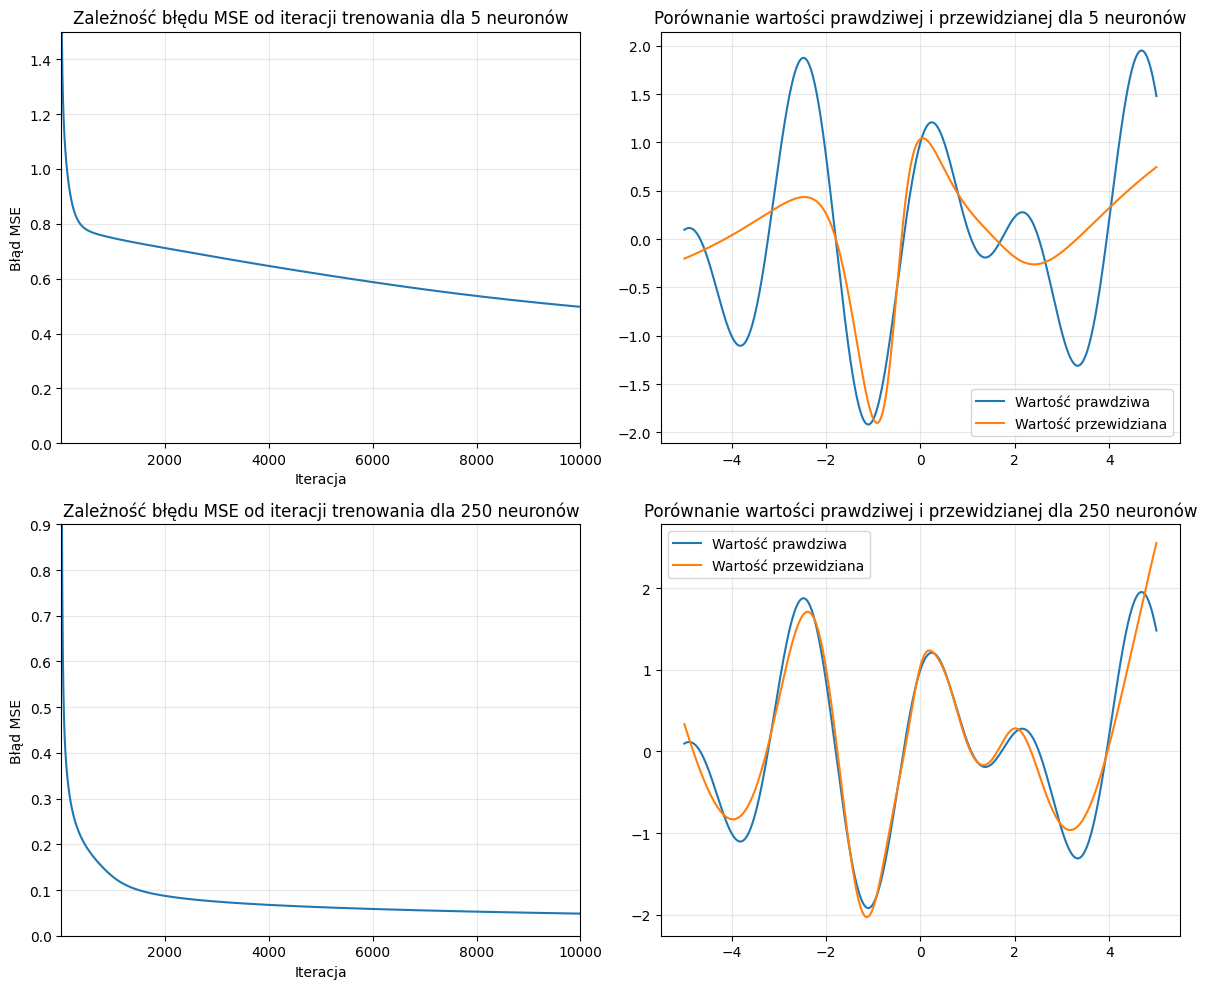

In [14]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(losses_5)
plt.xlabel('Iteracja')
plt.xlim(10, 10000)
plt.ylabel('Błąd MSE')
plt.ylim(0, 1.5)
plt.title('Zależność błędu MSE od iteracji trenowania dla 5 neuronów')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(X, Y, label='Wartość prawdziwa')
plt.plot(X_test, Y_pred_5, label='Wartość przewidziana')
plt.legend()
plt.title('Porównanie wartości prawdziwej i przewidzianej dla 5 neuronów')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 3)
plt.plot(losses_200)
plt.xlabel('Iteracja')
plt.xlim(10, 10000)
plt.ylabel('Błąd MSE')
plt.ylim(0, 0.9)
plt.title('Zależność błędu MSE od iteracji trenowania dla 250 neuronów')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 4)
plt.plot(X, Y, label='Wartość prawdziwa')
plt.plot(X_test, Y_pred_200, label='Wartość przewidziana')
plt.legend()
plt.title('Porównanie wartości prawdziwej i przewidzianej dla 250 neuronów')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Powyższe wykresy wyraźnie pokazują różnicę w trenowaniu i przewidywaniach algorytmu w zależności od liczby neuronów w warstwie ukrytej. Zwiększenie parametru `hidden_size` znacząco zwiększyło dopasowanie przewidywań do rzeczywistych wartości funkcji.